In [1]:
!pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv torch_geometric rdkit -f https://data.pyg.org/whl/torch-1.13.0+cu117.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.0+cu117.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.2/872.2 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.0/565.0 KB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 13.8 MB/s eta 0:00:00
  Created wheel for torch_geometric: filename=torch_geometric-2.2.0-py3-none-any.whl size=773302 sha256=353f487456e1f9c81bcf0fb6bcf4e3d6696bdcb8d25ec5f6ccbbec8aa9ab6b18
  Stored in directory: /root/.cache/pip/wheels/31/b2/8c/9b4bb72

In [33]:
import torch
import torch_geometric
import pandas as pd
import numpy as np

In [22]:
logp_dataset = pd.read_csv('Final MFLOGP Dataset.csv')

logp_dataset.head()

,Names,Formula,CAS No,SMILES,Reference,Exp logp,C,H,N,O,S,P,F,Cl,Br,I,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,formaldehyde,C1H2O1,000050-00-0,C=O,"hansch,c et al. (1995)",0.35,1,2,0,1,0,0,0,0,0,0,NaN,2,90.0
1,"9-fluoro-11,17-dihydroxy-17-(2-hydroxyacetyl)-...",C22H29F1O5,000378-44-9,CC1CC2C3CCC4=CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O...,"hansch,c et al. (1995)",1.94,22,29,0,5,0,0,1,0,0,0,NaN,28,NaN
2,"[2-(11,17-dihydroxy-10,13-dimethyl-3-oxo-2,6,7...",C23H32O6,000050-03-3,CC(=O)OCC(=O)C1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3C(...,"hansch,c et al. (1995)",2.19,23,32,0,6,0,0,0,0,0,0,NaN,29,NaN
3,"[2-(17-hydroxy-10,13-dimethyl-3,11-dioxo-1,2,6...",C23H30O6,000050-04-4,CC(=O)OCC(=O)C1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3C(...,"hansch,c et al. (1995)",2.10,23,30,0,6,0,0,0,0,0,0,NaN,29,NaN
4,"5-ethyl-5-phenyl-1,3-diazinane-2,4,6-trione",C12H12N2O3,000050-06-6,CCC1(C(=O)NC(=O)NC1=O)c2ccccc2,"hansch,c et al. (1995)",1.47,12,12,2,3,0,0,0,0,0,0,NaN,17,NaN


In [23]:
smiles_sample = logp_dataset[logp_dataset['Names'] == 'picloram'].iloc[0]['SMILES']

graph_sample = torch_geometric.utils.smiles.from_smiles(smiles_sample)

graph_sample

Data(x=[13, 9], edge_index=[2, 26], edge_attr=[26, 3], smiles='Nc1c(Cl)c(Cl)nc(C(O)=O)c1Cl')

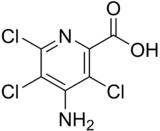

In [25]:
# Atomic n, chirality, degree, formal charge, n hydrogens, n radical electrons, hybridization, aromatic?, in ring?

print(graph_sample.x)

tensor([[ 7,  0,  3,  5,  2,  0,  3,  0,  0],
        [ 6,  0,  3,  5,  0,  0,  3,  1,  1],
        [ 6,  0,  3,  5,  0,  0,  3,  1,  1],
        [17,  0,  1,  5,  0,  0,  4,  0,  0],
        [ 6,  0,  3,  5,  0,  0,  3,  1,  1],
        [17,  0,  1,  5,  0,  0,  4,  0,  0],
        [ 7,  0,  2,  5,  0,  0,  3,  1,  1],
        [ 6,  0,  3,  5,  0,  0,  3,  1,  1],
        [ 6,  0,  3,  5,  0,  0,  3,  0,  0],
        [ 8,  0,  2,  5,  1,  0,  3,  0,  0],
        [ 8,  0,  1,  5,  0,  0,  3,  0,  0],
        [ 6,  0,  3,  5,  0,  0,  3,  1,  1],
        [17,  0,  1,  5,  0,  0,  4,  0,  0]])


In [29]:
# Bond type, stereo, conjugated?

print(graph_sample.edge_attr)

tensor([[ 1,  0,  1],
        [ 1,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [ 1,  0,  0],
        [12,  0,  1],
        [ 1,  0,  0],
        [12,  0,  1],
        [ 1,  0,  0],
        [12,  0,  1],
        [ 1,  0,  0],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [ 1,  0,  1],
        [12,  0,  1],
        [ 1,  0,  1],
        [ 1,  0,  1],
        [ 2,  0,  1],
        [ 1,  0,  1],
        [ 2,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [ 1,  0,  0],
        [ 1,  0,  0]])


In [50]:
all_atoms_counts = {}

for smiles in logp_dataset['SMILES']:
  smiles_graph = torch_geometric.utils.smiles.from_smiles(smiles)

  graph_atoms = smiles_graph.x[:,0]

  atoms, counts = np.unique(graph_atoms, return_counts=True)

  for i, atom in enumerate(atoms):
    if atom not in all_atoms_counts:
      all_atoms_counts[atom] = counts[i]
    else:
      all_atoms_counts[atom] += counts[i]
    
all_atoms_counts

{6: 197242,
 8: 36192,
 9: 2992,
 7: 23586,
 15: 450,
 17: 6369,
 16: 3274,
 53: 265,
 35: 938,
 1: 19,
 14: 1,
 50: 1,
 74: 11,
 11: 5,
 19: 1}